# Portfolio Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['AAPL','MSFT','AMD','NVDA']
start = '2012-01-01'
end = '2019-09-11'

# Read data 
dataset = yf.download(symbols,start,end)['Adj Close']

# View Columns
dataset.head()

[*********************100%***********************]  4 of 4 downloaded


,AAPL,AMD,MSFT,NVDA
Date,,,,
2012-01-03,51.269413,5.48,22.156071,12.939396
2012-01-04,51.544937,5.46,22.677486,13.086854
2012-01-05,52.117188,5.46,22.909233,13.556875
2012-01-06,52.662014,5.43,23.265116,13.400198
2012-01-09,52.578468,5.59,22.958887,13.400198


In [3]:
# Calculate Daily Returns
returns = dataset.pct_change()

In [4]:
returns = returns.dropna()

In [5]:
returns.head()

,AAPL,AMD,MSFT,NVDA
Date,,,,
2012-01-04,0.005374,-0.003650,0.023534,0.011396
2012-01-05,0.011102,0.000000,0.010219,0.035916
2012-01-06,0.010454,-0.005495,0.015534,-0.011557
2012-01-09,-0.001586,0.029466,-0.013163,0.000000
2012-01-10,0.003581,0.021467,0.003605,-0.004126


In [6]:
# Calculate mean returns
meanDailyReturns = returns.mean()
print(meanDailyReturns)

AAPL    0.000878
AMD     0.001575
MSFT    0.001044
NVDA    0.001652
dtype: float64


In [7]:
# Calculate std returns
stdDailyReturns = returns.std()
print(stdDailyReturns)

AAPL    0.016245
AMD     0.037615
MSFT    0.014470
NVDA    0.023808
dtype: float64


In [8]:
# Define weights for the portfolio
weights = np.array([0.5, 0.2, 0.2, 0.1])

In [9]:
# Calculate the covariance matrix on daily returns
cov_matrix = (returns.cov())*250
print (cov_matrix)

          AAPL       AMD      MSFT      NVDA
AAPL  0.065974  0.038292  0.025152  0.034493
AMD   0.038292  0.353730  0.036180  0.094201
MSFT  0.025152  0.036180  0.052348  0.037223
NVDA  0.034493  0.094201  0.037223  0.141710


In [10]:
# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

In [11]:
# Print the portfolio return
print(portReturn)

0.00112807303295


In [12]:
# Create portfolio returns column
returns['Portfolio'] = returns.dot(weights)

In [13]:
returns.head()

,AAPL,AMD,MSFT,NVDA,Portfolio
Date,,,,,
2012-01-04,0.005374,-0.003650,0.023534,0.011396,0.007803
2012-01-05,0.011102,0.000000,0.010219,0.035916,0.011186
2012-01-06,0.010454,-0.005495,0.015534,-0.011557,0.006079
2012-01-09,-0.001586,0.029466,-0.013163,0.000000,0.002467
2012-01-10,0.003581,0.021467,0.003605,-0.004126,0.006392


In [14]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print(daily_cum_ret.tail())

                AAPL       AMD      MSFT       NVDA  Portfolio
Date                                                          
2019-09-04  4.080211  5.647810  6.211842  13.042339   6.920307
2019-09-05  4.159985  5.748175  6.321067  13.890912   7.081916
2019-09-06  4.159595  5.576642  6.278189  13.806672   7.025415
2019-09-09  4.177344  5.565693  6.206877  13.949646   7.028960
2019-09-10  4.226692  5.516423  6.141883  14.156765   7.053748


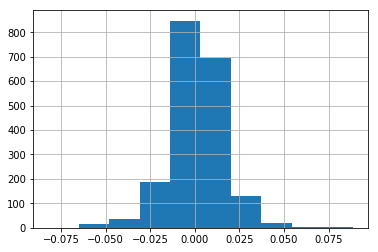

In [15]:
returns['Portfolio'].hist()
plt.show()

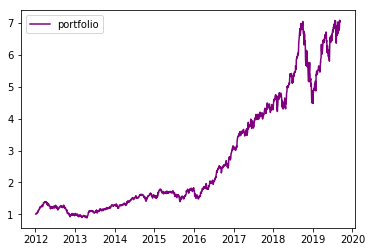

In [16]:
import matplotlib.dates

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

In [17]:
# Print the mean
print("mean : ", returns['Portfolio'].mean()*100)

# Print the standard deviation
print("Std. dev: ", returns['Portfolio'].std()*100)

# Print the skewness
print("skew: ", returns['Portfolio'].skew())

# Print the kurtosis
print("kurt: ", returns['Portfolio'].kurtosis())

mean :  0.11280730329520924
Std. dev:  1.5289593176510718
skew:  -0.133433702248
kurt:  2.96049017087


In [18]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(weights, cov_matrix)))

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

24.17%


In [19]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

5.84%


In [20]:
# Calculate total return and annualized return from price data 
total_return = (returns['Portfolio'][-1] - returns['Portfolio'][0]) / returns['Portfolio'][0]

# Annualize the total return over 6 year 
annualized_return = ((total_return + 1)**(1/6))-1

In [21]:
# Calculate annualized volatility from the standard deviation
vol_port = returns['Portfolio'].std() * np.sqrt(250)

In [22]:
# Calculate the Sharpe ratio 
rf = 0.01
sharpe_ratio = ((annualized_return - rf) / vol_port)
print (sharpe_ratio)

-0.554238786819


If the analysis results in a negative Sharpe ratio, it either means the risk-free rate is greater than the portfolio's return, or the portfolio's return is expected to be negative. 

In [23]:
# Create a downside return column with the negative returns only
target = 0
downside_returns = returns.loc[returns['Portfolio'] < target]

# Calculate expected return and std dev of downside
expected_return = returns['Portfolio'].mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
rf = 0.01
sortino_ratio = (expected_return - rf)/down_stdev

# Print the results
print("Expected return: ", expected_return*100)
print('-' * 50)
print("Downside risk:")
print(down_stdev*100)
print('-' * 50)
print("Sortino ratio:")
print(sortino_ratio)

Expected return:  0.11280730329520924
--------------------------------------------------
Downside risk:
AAPL         1.363155
AMD          2.957687
MSFT         1.292771
NVDA         2.036317
Portfolio    1.087610
dtype: float64
--------------------------------------------------
Sortino ratio:
AAPL        -0.650838
AMD         -0.299962
MSFT        -0.686272
NVDA        -0.435685
Portfolio   -0.815727
dtype: float64


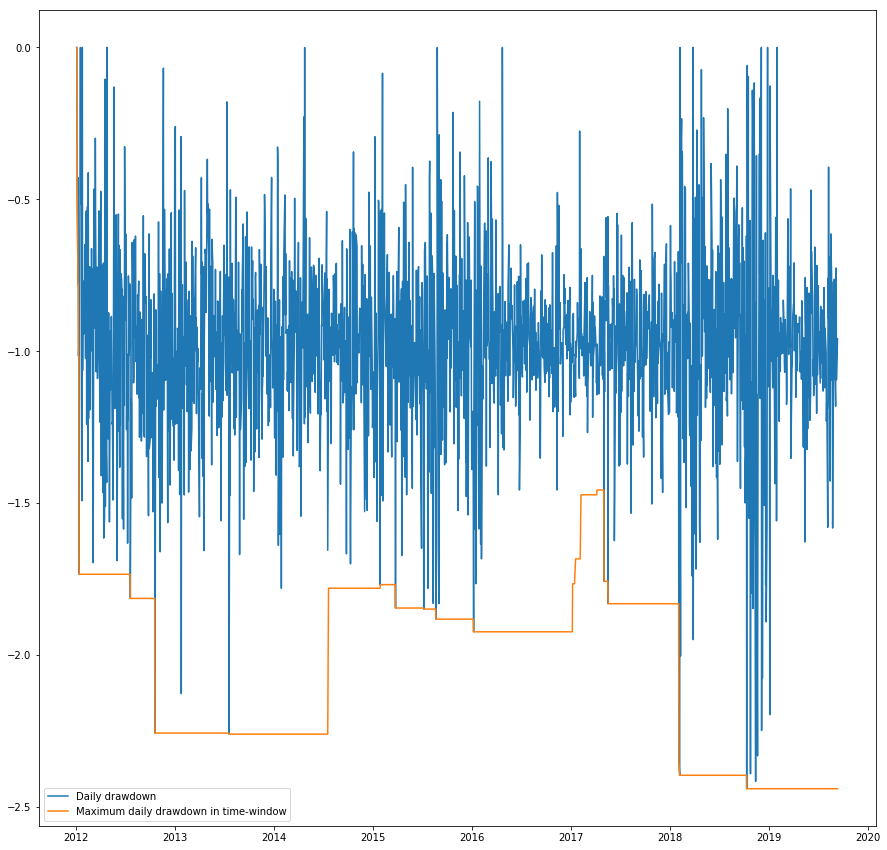

In [24]:
# Calculate the max value 
roll_max = returns['Portfolio'].rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = returns['Portfolio']/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(returns.index, daily_draw_down, label='Daily drawdown')
plt.plot(returns.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()